In [10]:
import numpy as np
rng = np.random.default_rng(seed=1701)

x = rng.integers(100, size=10)
print(x)

[90 40  9 30 80 67 39 15 33 79]


In [11]:
[x[3], x[7], x[2]]

[30, 15, 9]

In [14]:
ind = [3,7,4]
x[ind]

array([30, 15, 80])

In [16]:
ind = np.array([[3,7], 
                [4,5]])
x[ind]

array([[30, 15],
       [80, 67]])

In [19]:
x = np.arange(12).reshape((3,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [22]:
row = np.array ([0,1,2])
col = np.array ([2,1,3])
x[row,col]

array([ 2,  5, 11])

In [23]:
x[row[:, np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [24]:
row[:,np.newaxis]*col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [29]:
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [26]:
x[2,[2,0,1]]

array([10,  8,  9])

In [27]:
x[1:,[2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [30]:
mask =  np.array([1,0,1,0], dtype = bool)
x[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [32]:
mean = [0,0] 
cov = [[1,2],
      [2,5]]
x = rng.multivariate_normal(mean, cov, 100)
x.shape

(100, 2)

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [19]:
plt.style.use('ggplot')

import seaborn as sns
sns.set_style('whitegrid')
!pip install seaborn

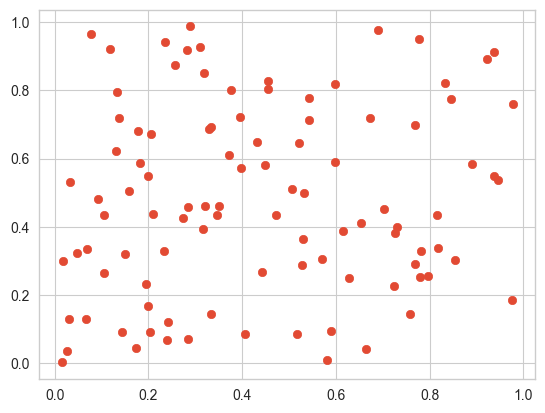

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style('whitegrid')

# Generate some sample data
x = np.random.rand(100, 2)  # 100 random points with two features (x and y)

# Scatter plot
plt.scatter(x[:, 0], x[:, 1])
plt.show()

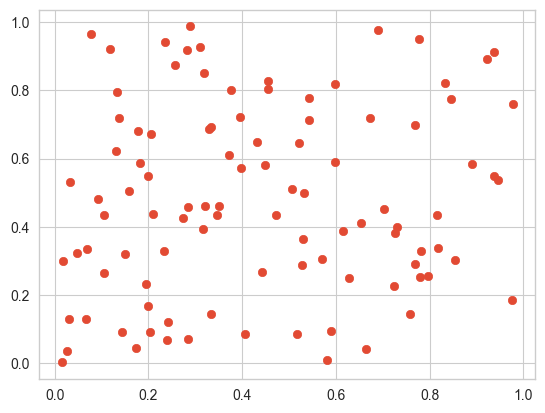

In [33]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style('whitegrid')

# Sample data (replace with your own data)
# x = np.random.rand(100, 2)  # This line is only needed if x is not defined

# Normalize data
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

# Scatter plot of normalized data
%matplotlib inline
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [34]:
indices = np.random.choice(x.shape[0], 20, replace=False)
indices

array([20, 33, 64, 28, 67, 36, 45, 55, 58, 98, 96, 32, 74, 85, 81, 23,  7,
       62, 83, 21])

In [35]:
selection = x[indices]
selection.shape

(20, 2)

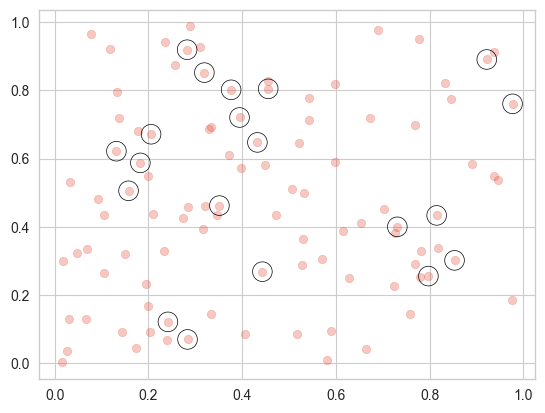

In [40]:
plt.scatter(x[:,0], x[:,1], alpha=0.3)
plt.scatter(selection[:,0],selection[:,1],
           facecolor='none', edgecolor='black', s=200)

In [43]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [44]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [45]:
x = np.zeros(10)
x[[0,0]] = [4,5]
print(x)


[5. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [46]:
i = [2,3,3,4,4,4]
x[i] += 1
x

array([5., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [47]:
x = np.zeros(10)
np.add.at(x,i,1)
print(x)


[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [50]:
np.random.seed(42)
x = np.random.rand(100)

bins = np.linspace(-5, 5 , 20)
counts = np.zeros_like(bins)

i = np.searchsorted(bins, x)

np.add.at(counts, i, 1)

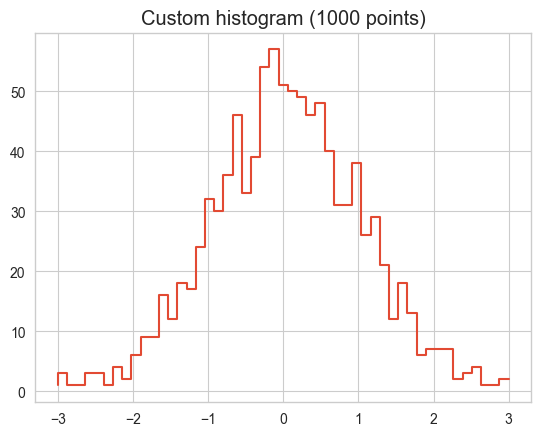

Execution time: 0.000094 seconds


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Sample data
x = np.random.randn(1000)  # Example array with random data
bins = np.linspace(-3, 3, 50)  # Example bin edges
counts = np.zeros_like(bins)  # Array for storing counts

# Custom histogram counting using np.add.at, limiting the index range to prevent out-of-bounds errors
indices = np.searchsorted(bins, x)
indices = np.clip(indices, 0, len(counts) - 1)  # Ensure indices are within valid range
np.add.at(counts, indices, 1)

# Plot the histogram using drawstyle='steps'
plt.plot(bins, counts, drawstyle='steps')
plt.title(f"Custom histogram ({len(x)} points)")
plt.show()

# Timing the np.add.at operation
start_time = time.time()
np.add.at(counts, indices, 1)  # Increment counts
elapsed_time = time.time() - start_time  # Calculate elapsed time

print(f"Execution time: {elapsed_time:.6f} seconds")

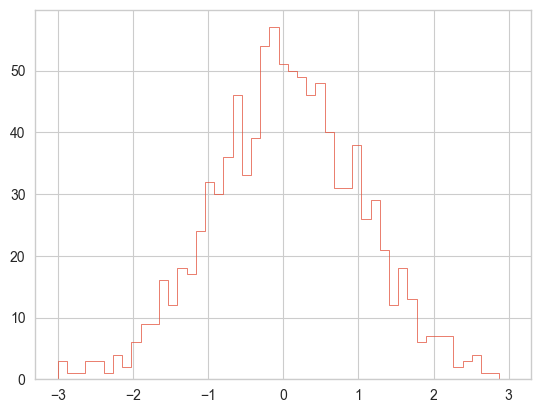

In [59]:
plt.hist(x, bins, histtype = 'step');

In [69]:
print(f"Numpy histogram ({len(x)} points):")
%timeit counts, edges = np.histogram(x, bins)

Numpy histogram (1000 points):
16.4 µs ± 119 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [71]:
# Assume x, bins, and counts are already defined
# bins is assumed to have len(bins) == len(counts)

# Clip the indices to the valid range (0 to len(counts) - 1)
indices = np.clip(np.searchsorted(bins, x), 0, len(counts) - 1)

# Increment counts at the clipped indices
np.add.at(counts, indices, 1)

print(f"Custom histogram ({len(x)} points):")
%timeit np.add.at(counts, indices, 1)

Custom histogram (1000 points):
38.8 µs ± 368 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [79]:
import numpy as np
import time

# Initialize random number generator
rng = np.random.default_rng()

# Generate random numbers
x = rng.normal(size=1000000)

# Define histogram bins
bins = np.linspace(np.min(x), np.max(x), 100)  # Creating 100 bins

# Timing NumPy histogram
print(f"NumPy histogram ({len(x)} points):")
start_time = time.time()
counts, edges = np.histogram(x, bins)
numpy_histogram_time = time.time() - start_time
print(f"Time taken: {numpy_histogram_time:.6f} seconds")

# Custom histogram logic
counts_custom = np.zeros(len(bins) - 1, dtype=int)

# Timing custom histogram
print(f"Custom histogram ({len(x)} points):")
start_time = time.time()
np.add.at(counts_custom, np.searchsorted(bins, x) - 1, 1)
custom_histogram_time = time.time() - start_time
print(f"Time taken: {custom_histogram_time:.6f} seconds")

NumPy histogram (1000000 points):
Time taken: 0.084806 seconds
Custom histogram (1000000 points):
Time taken: 0.038670 seconds
